In [1]:
import matplotlib.pyplot as plt 
import geopandas as gpd 
import  numpy as np
import pandas as pd

df = pd.read_csv(r"datos_resumidos.csv")
df

,Unnamed: 0,Estacion,Laguna_base,Abundancia,Riqueza,Shannon_H,Equitatividad_J,pH,Temperatura,Oxigeno mg/L,Conductividad,Profundidad m,Turbidez m,ph lab,DBO5 mg O2/L
0,0,invierno,Crespo,3.136600,5.000000,0.928037,0.576622,9.110000,12.500000,9.000000,1700.000000,0.250000,0.250000,8.91,5
1,1,invierno,Espinillo,3.480895,10.666667,1.988960,0.848965,8.456667,16.966667,9.600000,1425.000000,0.660000,0.660000,7.60,5
2,2,invierno,Gazano,12254.770530,5.000000,0.729670,0.456080,9.260000,10.900000,8.333333,450.666667,0.330000,0.293333,7.51,6
3,3,invierno,Hernandez,295.000000,12.000000,1.861219,0.752338,7.466667,12.100000,6.133333,213.000000,0.500000,0.100000,6.40,7
4,4,invierno,Inta,152.268518,9.000000,1.277624,0.587670,9.496667,13.800000,9.633333,784.333333,0.673333,0.346667,7.50,0
5,5,invierno,Termas,346.296296,8.333333,1.494473,0.702539,9.580000,14.800000,10.433333,476.666667,0.650000,0.623333,7.80,5
6,6,invierno,Viale,470.000000,8.000000,1.104323,0.533726,8.226667,12.066667,7.166667,124.000000,0.693333,0.186667,7.45,5
7,7,otonio,Crespo,142.407407,9.333333,1.471242,0.656253,9.326667,11.966667,3.633333,1552.333333,0.260000,0.260000,8.91,9
8,8,otonio,Espinillo,42.478632,5.666667,1.134814,0.656416,8.600000,14.900000,3.433333,1357.666667,0.716667,0.716667,7.60,3
9,9,otonio,Gazano,3003.333333,5.666667,1.012563,0.590353,9.223333,12.233333,4.066667,430.000000,0.380000,0.276667,7.51,0


In [8]:
hfi = {"Inta":6.83,
       "Hernandez":3.11,
       "Viale":5.09,
       "Crespo":7.32,
       "Espinillo": 4.42,
       "Termas":5.69,
       "Gazano": 6.93
       }

df["HFI"] = df["Laguna_base"].map(hfi)
df

,Unnamed: 0,Estacion,Laguna_base,Abundancia,Riqueza,Shannon_H,Equitatividad_J,pH,Temperatura,Oxigeno mg/L,Conductividad,Profundidad m,Turbidez m,ph lab,DBO5 mg O2/L,HFI
0,0,invierno,Crespo,3.136600,5.000000,0.928037,0.576622,9.110000,12.500000,9.000000,1700.000000,0.250000,0.250000,8.91,5,7.32
1,1,invierno,Espinillo,3.480895,10.666667,1.988960,0.848965,8.456667,16.966667,9.600000,1425.000000,0.660000,0.660000,7.60,5,4.42
2,2,invierno,Gazano,12254.770530,5.000000,0.729670,0.456080,9.260000,10.900000,8.333333,450.666667,0.330000,0.293333,7.51,6,6.93
3,3,invierno,Hernandez,295.000000,12.000000,1.861219,0.752338,7.466667,12.100000,6.133333,213.000000,0.500000,0.100000,6.40,7,3.11
4,4,invierno,Inta,152.268518,9.000000,1.277624,0.587670,9.496667,13.800000,9.633333,784.333333,0.673333,0.346667,7.50,0,6.83
5,5,invierno,Termas,346.296296,8.333333,1.494473,0.702539,9.580000,14.800000,10.433333,476.666667,0.650000,0.623333,7.80,5,5.69
6,6,invierno,Viale,470.000000,8.000000,1.104323,0.533726,8.226667,12.066667,7.166667,124.000000,0.693333,0.186667,7.45,5,5.09
7,7,otonio,Crespo,142.407407,9.333333,1.471242,0.656253,9.326667,11.966667,3.633333,1552.333333,0.260000,0.260000,8.91,9,7.32
8,8,otonio,Espinillo,42.478632,5.666667,1.134814,0.656416,8.600000,14.900000,3.433333,1357.666667,0.716667,0.716667,7.60,3,4.42
9,9,otonio,Gazano,3003.333333,5.666667,1.012563,0.590353,9.223333,12.233333,4.066667,430.000000,0.380000,0.276667,7.51,0,6.93


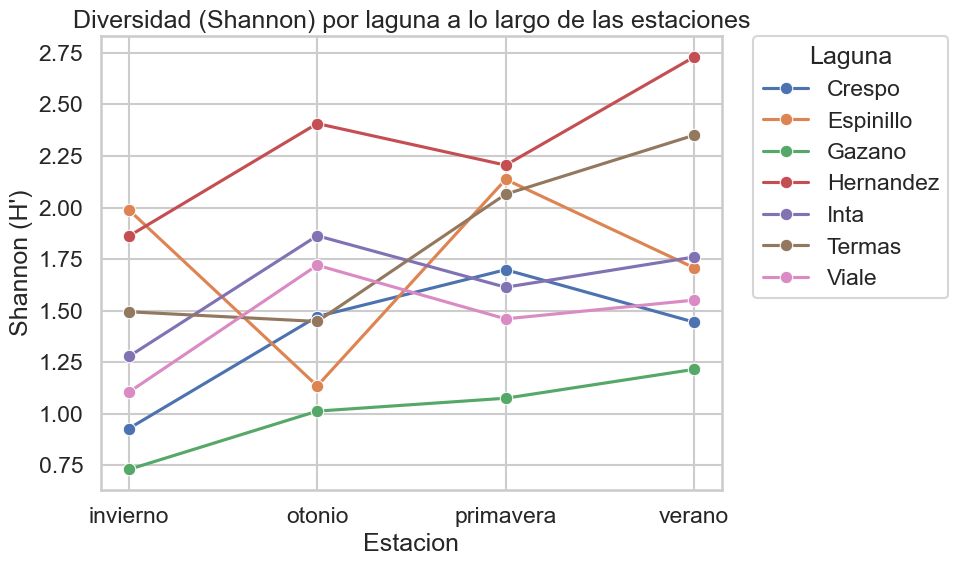

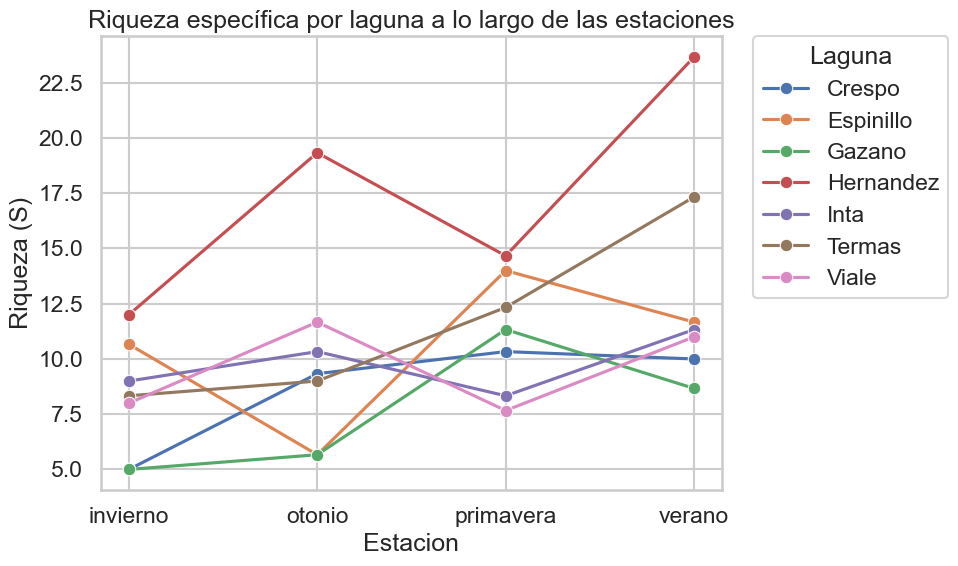

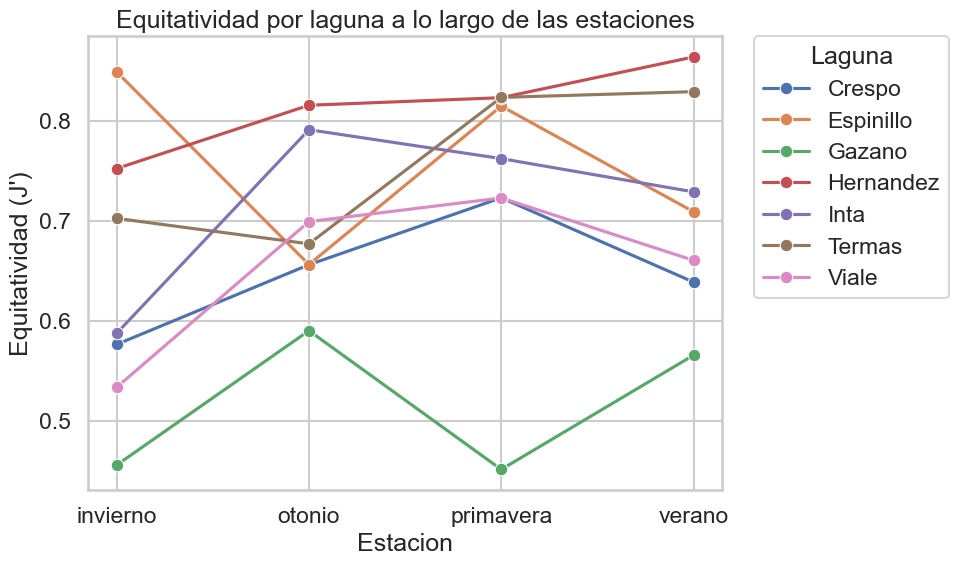

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", context="talk")

# --- Gráfico de Shannon ---
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Estacion", y="Shannon_H", hue="Laguna_base", marker="o")
plt.title("Diversidad (Shannon) por laguna a lo largo de las estaciones")
plt.ylabel("Shannon (H')")
plt.legend(
    title="Laguna",
    bbox_to_anchor=(1.05, 1),   # posición relativa: (x, y)
    loc='upper left',           # anclaje del cuadro de leyenda
    borderaxespad=0.
)

plt.tight_layout()
plt.show()

# --- Gráfico de Riqueza ---
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Estacion", y="Riqueza", hue="Laguna_base", marker="o")
plt.title("Riqueza específica por laguna a lo largo de las estaciones")
plt.ylabel("Riqueza (S)")
plt.legend(
    title="Laguna",
    bbox_to_anchor=(1.05, 1),   # posición relativa: (x, y)
    loc='upper left',           # anclaje del cuadro de leyenda
    borderaxespad=0.
)

plt.tight_layout()
plt.show()

# --- Gráfico de Equitatividad ---
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Estacion", y="Equitatividad_J", hue="Laguna_base", marker="o")
plt.title("Equitatividad por laguna a lo largo de las estaciones")
plt.ylabel("Equitatividad (J')")
plt.legend(
    title="Laguna",
    bbox_to_anchor=(1.05, 1),   # posición relativa: (x, y)
    loc='upper left',           # anclaje del cuadro de leyenda
    borderaxespad=0.
)

plt.tight_layout()
plt.show()


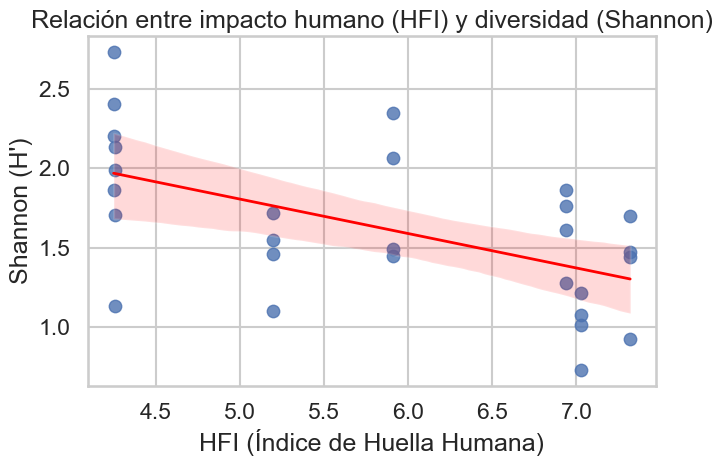

In [4]:
import seaborn as sns

sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(7,5))
sns.regplot(
    data=df,
    x="HFI",
    y="Shannon_H",
    scatter_kws={"s":80, "alpha":0.8},
    line_kws={"color":"red", "lw":2},
    ci=95
)
plt.title("Relación entre impacto humano (HFI) y diversidad (Shannon)")
plt.xlabel("HFI (Índice de Huella Humana)")
plt.ylabel("Shannon (H')")
plt.tight_layout()
plt.show()


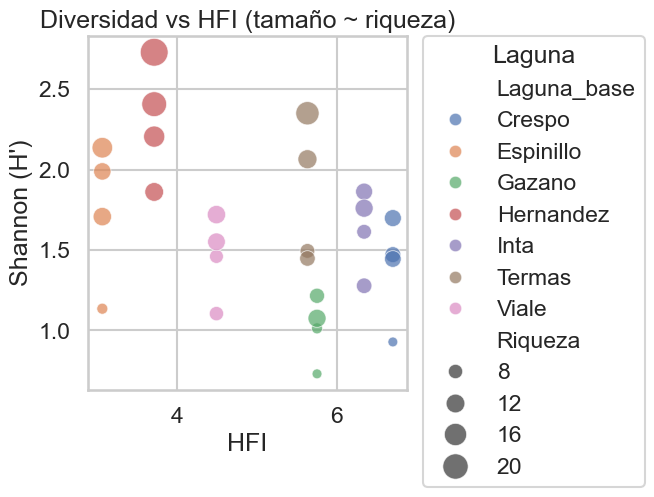

In [16]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="HFI",
    y="Shannon_H",
    size="Riqueza",
    hue="Laguna_base",
    sizes=(50, 400),
    alpha=0.7
)
plt.title("Diversidad vs HFI (tamaño ~ riqueza)")
plt.xlabel("HFI")
plt.ylabel("Shannon (H')")
plt.legend(
    title="Laguna",
    bbox_to_anchor=(1.05, 1),   # posición relativa: (x, y)
    loc='upper left',           # anclaje del cuadro de leyenda
    borderaxespad=0.
)
plt.tight_layout()
plt.show()


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       28 non-null     int64  
 1   Estacion         28 non-null     object 
 2   Laguna_base      28 non-null     object 
 3   Abundancia       28 non-null     float64
 4   Riqueza          28 non-null     float64
 5   Shannon_H        28 non-null     float64
 6   Equitatividad_J  28 non-null     float64
 7   pH               28 non-null     float64
 8   Temperatura      28 non-null     float64
 9   Oxigeno mg/L     28 non-null     float64
 10  Conductividad    28 non-null     float64
 11  Profundidad m    28 non-null     float64
 12  Turbidez m       28 non-null     float64
 13  ph lab           28 non-null     float64
 14  DBO5 mg O2/L     28 non-null     int64  
 15  HFI              28 non-null     float64
dtypes: float64(12), int64(2), object(2)
memory usage: 3.6+ KB


In [10]:
df_annual = (
    df.groupby("Laguna_base")
      .agg({
          "Shannon_H": "mean",
          "Equitatividad_J": "mean",
          "Riqueza": "mean",
          "Abundancia": "mean",
          "pH": "mean",
          "Temperatura ": "mean",
          "Oxigeno mg/L": "mean",
          "Conductividad ": "mean",
          "Profundidad m": "mean",
          "Turbidez m": "mean",
          "DBO5 mg O2/L": "mean",
          "HFI": "first"     # mismo valor en todas las estaciones
      })
      .reset_index()
)

df_annual = df_annual.sort_values(by="HFI", ascending=False)
df_annual

,Laguna_base,Shannon_H,Equitatividad_J,Riqueza,Abundancia,pH,Temperatura,Oxigeno mg/L,Conductividad,Profundidad m,Turbidez m,DBO5 mg O2/L,HFI
0,Crespo,1.385467,0.648720,8.666667,144.117483,9.336667,20.067500,4.283333,1600.833333,0.260833,0.260833,3.50,7.32
2,Gazano,1.008146,0.515987,7.666667,4731.285225,9.068333,17.991667,6.050000,378.583333,0.341667,0.220000,9.75,6.93
4,Inta,1.628609,0.717535,9.750000,109.633488,9.056667,19.150000,5.441667,634.583333,0.580000,0.447500,0.00,6.83
5,Termas,1.839327,0.758055,11.750000,152.021991,9.157500,22.266667,6.091667,308.833333,0.561667,0.512500,1.25,5.69
6,Viale,1.458874,0.654158,9.583333,355.219907,8.390833,21.458333,5.575000,334.750000,0.837500,0.255000,1.25,5.09
1,Espinillo,1.741928,0.757329,10.500000,78.767660,8.823333,21.633333,5.609167,1440.583333,0.666667,0.566667,2.00,4.42
3,Hernandez,2.301044,0.813729,17.416667,386.111111,7.598333,18.675000,3.183333,178.666667,0.625000,0.300833,1.75,3.11


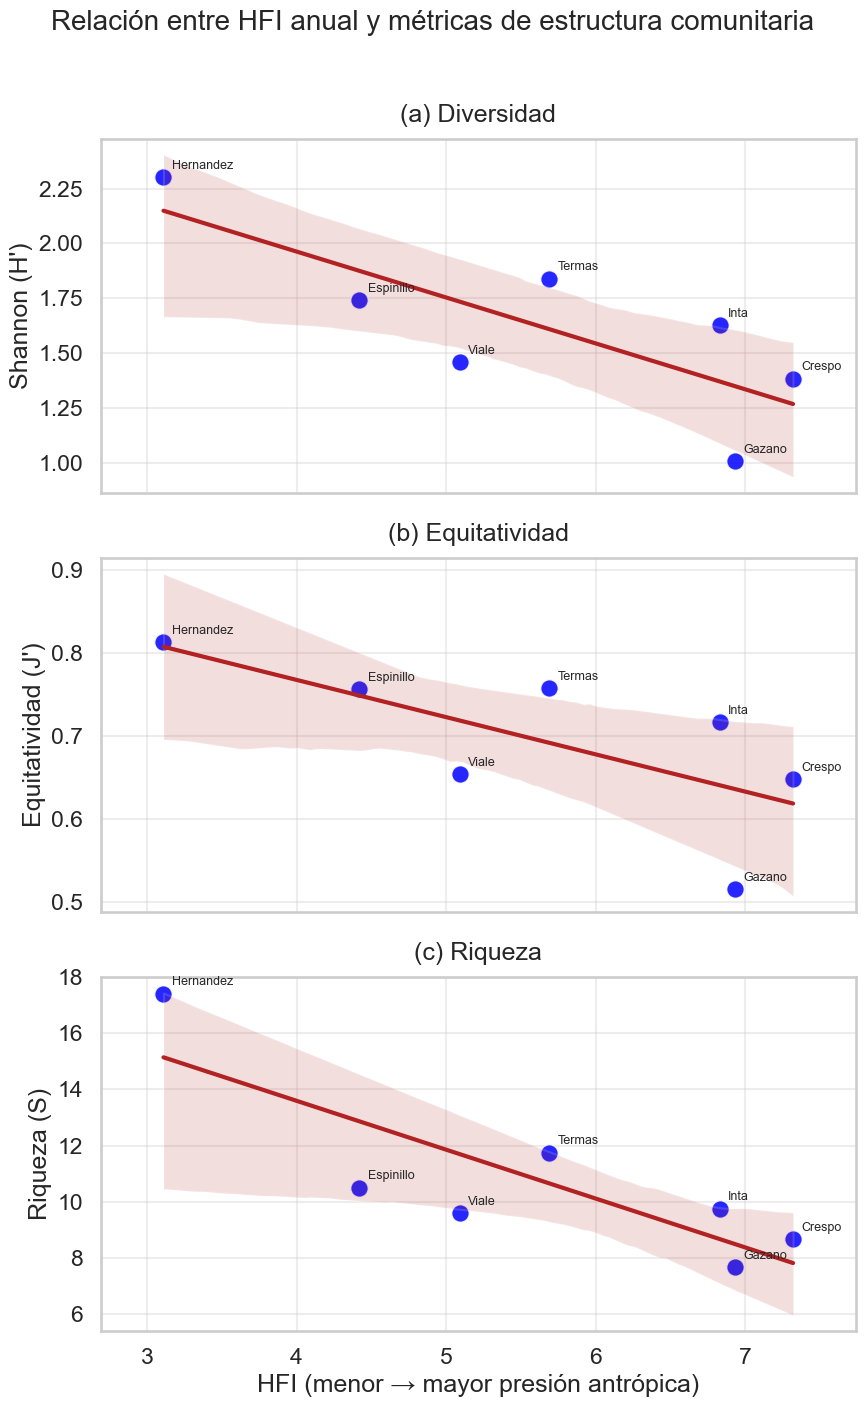

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar por gradiente de impacto humano
df_annual = df_annual.sort_values("HFI")

# Paneles (columna_y, etiqueta_y, título corto)
panels = [
    ("Shannon_H",       "Shannon (H')",       "(a) Diversidad"),
    ("Equitatividad_J", "Equitatividad (J')", "(b) Equitatividad"),
    ("Riqueza",         "Riqueza (S)",        "(c) Riqueza"),
]

sns.set(style="whitegrid", context="talk")

# → Layout VERTICAL (3 filas, 1 columna)
fig, axes = plt.subplots(3, 1, figsize=(9, 14), sharex=True)

xmin, xmax = df_annual["HFI"].min(), df_annual["HFI"].max()
xpad = 0.1 * (xmax - xmin)

for ax, (ycol, ylab, title_short) in zip(axes, panels):

    # Puntos
    sns.scatterplot(
        data=df_annual,
        x="HFI", y=ycol,
        s=160, color="blue", alpha=0.85,
        ax=ax
    )

    # Línea de regresión
    sns.regplot(
        data=df_annual,
        x="HFI", y=ycol,
        scatter=False, ci=95, ax=ax,
        line_kws={"color":"firebrick", "lw":3}
    )

    # Etiquetas de lagunas
    for _, r in df_annual.iterrows():
        ax.annotate(
            r["Laguna_base"], 
            (r["HFI"], r[ycol]),
            xytext=(6, 6), textcoords="offset points",
            fontsize=9
        )

    ax.set_title(title_short, pad=12)
    ax.set_ylabel(ylab)
    ax.set_xlim(xmin - xpad, xmax + xpad)
    ax.grid(True, alpha=0.35)

# Eje X común al final
axes[-1].set_xlabel("HFI (menor → mayor presión antrópica)")

fig.suptitle("Relación entre HFI anual y métricas de estructura comunitaria", y=1.01, fontsize=20)

plt.tight_layout()
plt.savefig("regresion.png")
plt.show()


In [12]:
df_annual_red =df_annual[["Laguna_base","Shannon_H","Equitatividad_J","Riqueza","HFI"]]
df_annual_red

,Laguna_base,Shannon_H,Equitatividad_J,Riqueza,HFI
3,Hernandez,2.301044,0.813729,17.416667,3.11
1,Espinillo,1.741928,0.757329,10.500000,4.42
6,Viale,1.458874,0.654158,9.583333,5.09
5,Termas,1.839327,0.758055,11.750000,5.69
4,Inta,1.628609,0.717535,9.750000,6.83
2,Gazano,1.008146,0.515987,7.666667,6.93
0,Crespo,1.385467,0.648720,8.666667,7.32


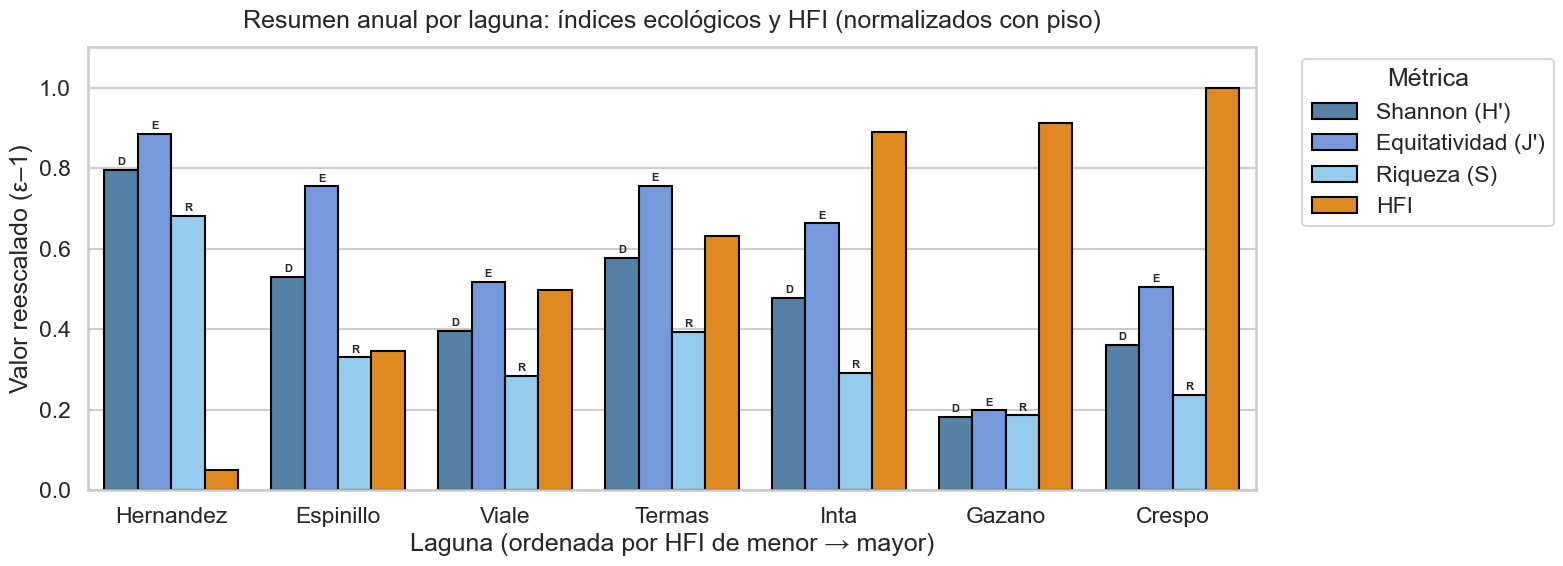

In [13]:

df_plot = df.sort_values('HFI').copy()  # tu df reducido

def minmax01_eps(s, floor=0.05, ceil=1.0):   # piso 5%
    s = pd.to_numeric(s, errors='coerce')
    if s.isna().all():
        return s
    smin, smax = s.min(), s.max()
    rng = smax - smin
    if np.isclose(rng, 0):
        return pd.Series((floor+ceil)/2, index=s.index)  # columna constante
    scaled = (s - smin) / rng
    return scaled * (ceil - floor) + floor

cols = ['Shannon_H', 'Equitatividad_J', 'Riqueza', 'HFI']
for c in cols:
    df_plot[c + '_norm'] = minmax01_eps(df_plot[c], floor=0.05, ceil=1.0)

name_map = {
    'Shannon_H_norm': "Shannon (H')",
    'Equitatividad_J_norm': "Equitatividad (J')",
    'Riqueza_norm': 'Riqueza (S)',
    'HFI_norm': 'HFI'
}

df_long = (
    df_plot.melt(id_vars='Laguna_base',
                 value_vars=[c+'_norm' for c in cols],
                 var_name='Indice', value_name='Valor')
    .assign(Indice=lambda d: d['Indice'].map(name_map))
)


# Hue order fixed so containers come in known order
hue_order = ["Shannon (H')", "Equitatividad (J')", "Riqueza (S)", "HFI"]

palette = {
    "Shannon (H')": 'steelblue',
    "Equitatividad (J')": 'cornflowerblue',
    "Riqueza (S)": 'lightskyblue',
    "HFI": 'darkorange'
}

plt.figure(figsize=(16,6))
ax = sns.barplot(
    data=df_long,
    x='Laguna_base', y='Valor', hue='Indice',
    order=df_plot['Laguna_base'],
    hue_order=hue_order,
    palette=palette,
    errorbar=None,
    edgecolor="black"  # remove black outline
)

# Add tiny letter labels per metric using bar containers (no float matching)
short_labels = {"Shannon (H')": "D", "Equitatividad (J')": "E", "Riqueza (S)": "R", "HFI": ""}

# Matplotlib >=3.4 has bar_label; if not, fallback to manual annotate below
for container, metric in zip(ax.containers, hue_order):
    lab = short_labels[metric]
    if lab:
        try:
            ax.bar_label(container, labels=[lab]*len(container), label_type='edge',
                         padding=2, fontsize=8, fontweight='bold')
        except AttributeError:
            # Fallback for older Matplotlib
            for bar in container:
                ax.annotate(lab,
                            (bar.get_x()+bar.get_width()/2., bar.get_height()),
                            xytext=(0, 3), textcoords="offset points",
                            ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.title("Resumen anual por laguna: índices ecológicos y HFI (normalizados con piso)", pad=14)
plt.xlabel("Laguna (ordenada por HFI de menor → mayor)")
plt.ylabel("Valor reescalado (ε–1)")
plt.ylim(0, 1.1)
plt.legend(title='Métrica', bbox_to_anchor=(1.03, 1), loc='upper left')
plt.tight_layout()
plt.savefig("barras.png")
plt.show()


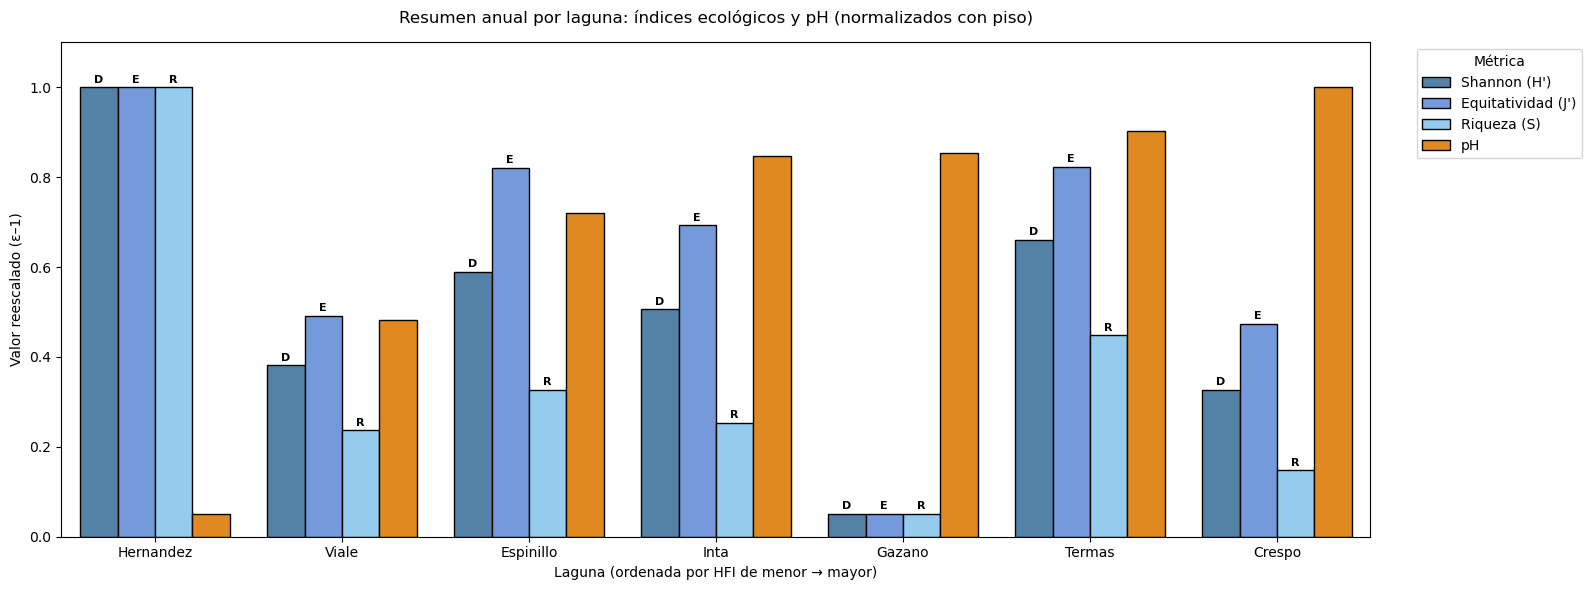

In [ ]:
import seaborn as sns

df_plot_ph = df_annual.sort_values('pH').copy()  # tu df reducido

def pH_score(pH, optimum=7.5, tol=2):
    score = 1 - (abs(pH - optimum) / tol)
    return np.clip(score, 0, 1)

df_plot_ph["pH_norm"] = pH_score(df_plot_ph["pH"])


cols = ['Shannon_H', 'Equitatividad_J', 'Riqueza', 'pH']
for c in cols:
    df_plot_ph[c + '_norm'] = minmax01_eps(df_plot_ph[c], floor=0.05, ceil=1.0)

name_map = {
    'Shannon_H_norm': "Shannon (H')",
    'Equitatividad_J_norm': "Equitatividad (J')",
    'Riqueza_norm': 'Riqueza (S)',
    'pH_norm': 'pH'
}

df_long = (
    df_plot_ph.melt(id_vars='Laguna_base',
                 value_vars=[c+'_norm' for c in cols],
                 var_name='Indice', value_name='Valor')
    .assign(Indice=lambda d: d['Indice'].map(name_map))
)


# Hue order fixed so containers come in known order
hue_order = ["Shannon (H')", "Equitatividad (J')", "Riqueza (S)", "pH"]

palette = {
    "Shannon (H')": 'steelblue',
    "Equitatividad (J')": 'cornflowerblue',
    "Riqueza (S)": 'lightskyblue',
    "pH": 'darkorange'
}

plt.figure(figsize=(16,6))
ax = sns.barplot(
    data=df_long,
    x='Laguna_base', y='Valor', hue='Indice',
    order=df_plot_ph['Laguna_base'].tolist(),   # ✅ ORDENAR POR pH
    hue_order=hue_order,
    palette=palette,
    errorbar=None,
    edgecolor="black"
)


# Add tiny letter labels per metric using bar containers (no float matching)
short_labels = {"Shannon (H')": "D", "Equitatividad (J')": "E", "Riqueza (S)": "R", "pH": ""}

# Matplotlib >=3.4 has bar_label; if not, fallback to manual annotate below
for container, metric in zip(ax.containers, hue_order):
    lab = short_labels[metric]
    if lab:
        try:
            ax.bar_label(container, labels=[lab]*len(container), label_type='edge',
                         padding=2, fontsize=8, fontweight='bold')
        except AttributeError:
            # Fallback for older Matplotlib
            for bar in container:
                ax.annotate(lab,
                            (bar.get_x()+bar.get_width()/2., bar.get_height()),
                            xytext=(0, 3), textcoords="offset points",
                            ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.title("Resumen anual por laguna: índices ecológicos y pH (normalizados con piso)", pad=14)
plt.xlabel("Laguna (ordenada por HFI de menor → mayor)")
plt.ylabel("Valor reescalado (ε–1)")
plt.ylim(0, 1.1)
plt.legend(title='Métrica', bbox_to_anchor=(1.03, 1), loc='upper left')
plt.tight_layout()
plt.savefig("barras.png")
plt.show()


In [8]:
df_annual.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 1
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Laguna_base      7 non-null      object 
 1   Shannon_H        7 non-null      float64
 2   Equitatividad_J  7 non-null      float64
 3   Riqueza          7 non-null      float64
 4   Abundancia       7 non-null      float64
 5   pH               7 non-null      float64
 6   Temperatura      7 non-null      float64
 7   Oxigeno mg/L     7 non-null      float64
 8   Conductividad    7 non-null      float64
 9   Profundidad m    7 non-null      float64
 10  Turbidez m       7 non-null      float64
 11  DBO5 mg O2/L     7 non-null      float64
 12  HFI              7 non-null      float64
dtypes: float64(12), object(1)
memory usage: 784.0+ bytes


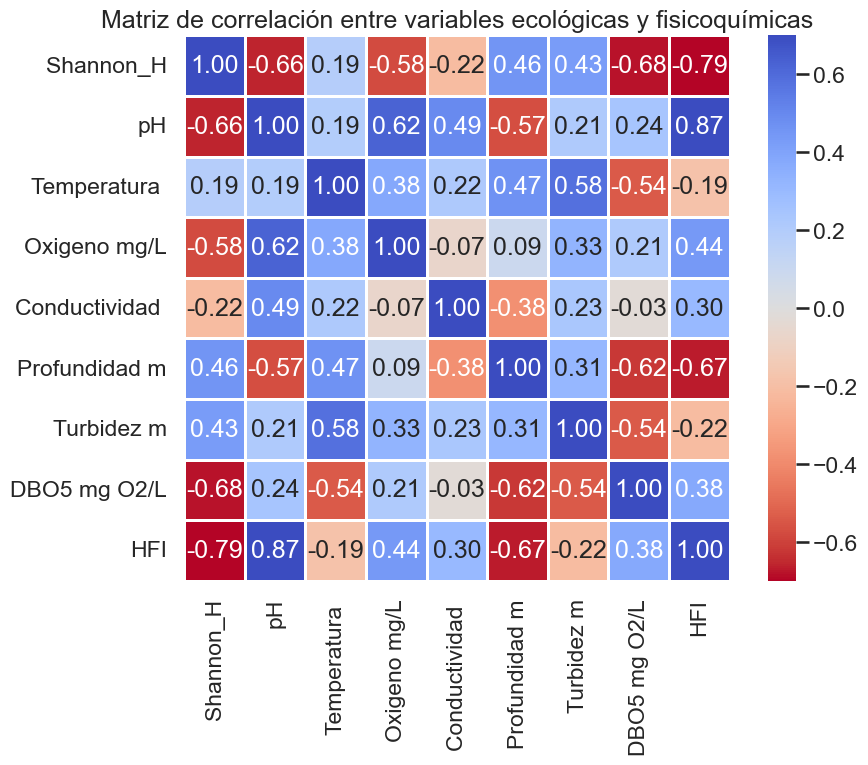

In [18]:
import seaborn as sns

cols = ["Shannon_H", "pH", "Temperatura ", "Oxigeno mg/L", "Conductividad ", "Profundidad m", "Turbidez m", "DBO5 mg O2/L", "HFI"]

# Seleccionar solo columnas numéricas
df_num = df_annual[cols]


corr = df_num.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm_r", center=0, fmt=".2f",vmin=-0.7, vmax=0.7,
            linewidths=0.8, square=True)

plt.title("Matriz de correlación entre variables ecológicas y fisicoquímicas")
plt.tight_layout()
plt.savefig("cor.png")
plt.show()

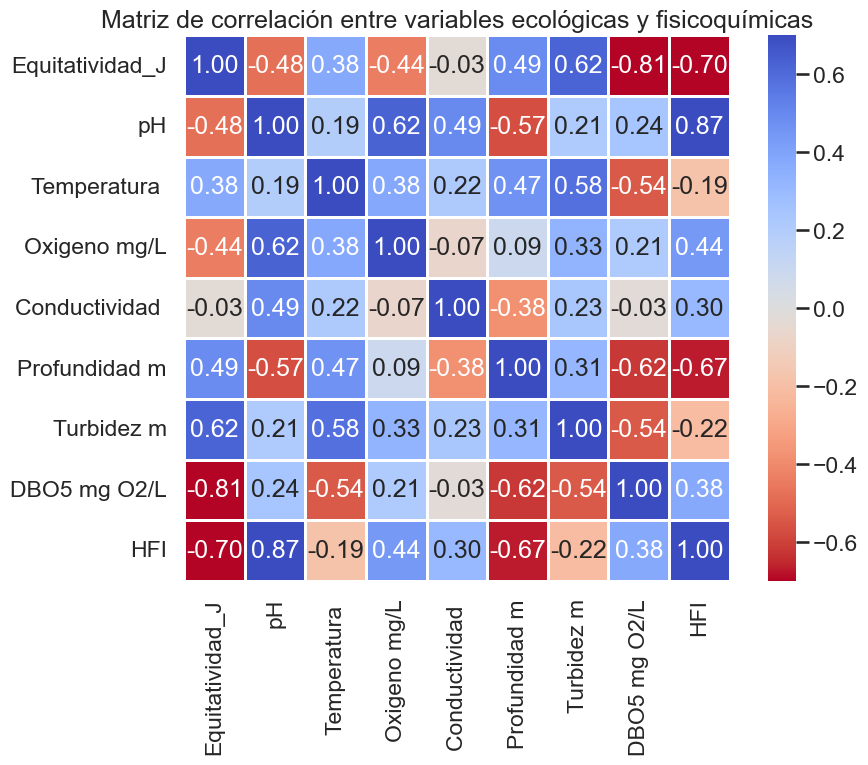

In [17]:
import seaborn as sns

cols = ["Equitatividad_J", "pH", "Temperatura ", "Oxigeno mg/L", "Conductividad ", "Profundidad m", "Turbidez m", "DBO5 mg O2/L", "HFI"]

# Seleccionar solo columnas numéricas
df_num = df_annual[cols]


corr = df_num.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm_r", center=0, fmt=".2f",vmin=-0.7, vmax=0.7,
            linewidths=0.8, square=True)

plt.title("Matriz de correlación entre variables ecológicas y fisicoquímicas")
plt.tight_layout()
plt.savefig("cor.png")
plt.show()


In [16]:
from scipy.stats import pearsonr
import pandas as pd

# Tomamos solo columnas numéricas
df_num = df_annual.select_dtypes(include=['float', 'int'])

resultados = []

for col in df_num.columns:
    if col != "Shannon_H":
        r, p = pearsonr(df_num["Shannon_H"], df_num[col])
        resultados.append([col, r, p])

df_corr_sig = pd.DataFrame(resultados, columns=["Variable", "Correlación_r", "p_value"])

# Ordenar por fuerza de correlación
df_corr_sig["|r|"] = df_corr_sig["Correlación_r"].abs()
df_corr_sig = df_corr_sig.sort_values("|r|", ascending=False)

def sig_label(p):
    if p < 0.001: return "***"   # muy significativo
    elif p < 0.01: return "**"
    elif p < 0.05: return "*"
    else: return "ns"            # no significativo

df_corr_sig["Significancia"] = df_corr_sig["p_value"].apply(sig_label)
df_corr_sig


,Variable,Correlación_r,p_value,|r|,Significancia
0,Equitatividad_J,0.958709,0.000651,0.958709,***
1,Riqueza,0.935532,0.001957,0.935532,**
10,HFI,-0.791506,0.033953,0.791506,*
9,DBO5 mg O2/L,-0.678317,0.093922,0.678317,ns
3,pH,-0.657827,0.108252,0.657827,ns
2,Abundancia,-0.648196,0.115354,0.648196,ns
5,Oxigeno mg/L,-0.577438,0.174607,0.577438,ns
7,Profundidad m,0.456720,0.302918,0.456720,ns
8,Turbidez m,0.426574,0.339874,0.426574,ns
6,Conductividad,-0.217511,0.639414,0.217511,ns
